In [38]:
! pip install nibabel --quiet

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [40]:
FILE_DIS = '/home/alexkkir/ai-masters/linal/project/t1_icbm_normal_1mm_pn3_rf20.mnc' # distorted
FILE_REF = '/home/alexkkir/ai-masters/linal/project/t1_icbm_normal_1mm_pn0_rf20.mnc' # reference

In [42]:
def get_data(filename: str) -> np.ndarray:
    file = nib.load(filename)
    data = file.get_fdata()
    return data

In [43]:
data_dis = get_data(FILE_DIS)
data_ref = get_data(FILE_REF)

In [69]:
def plot_data(data: np.ndarray, scale: float=0.1, dim: int=0, slice: int=0) -> None:
    shape = list(data.shape)
    shape.pop(dim)
    imgsize = np.multiply(shape, scale)
    plt.figure(figsize=imgsize)
    if dim == 0:
        data = data[slice, :, :]
    elif dim == 1:
        data = data[:, slice, :]
    elif dim == 2:
        data = data[:, :, slice]
    else:
        raise ValueError('Wrong dim argument')
    plt.imshow(data)
    plt.show()

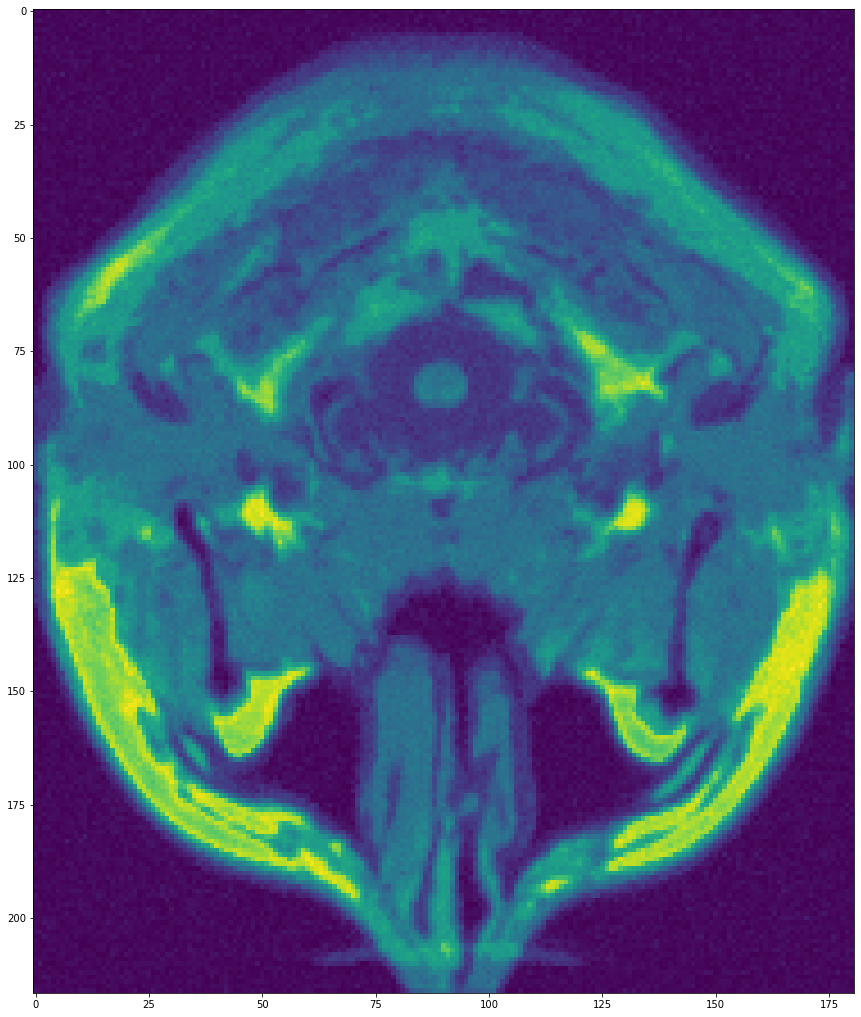

In [71]:
plot_data(data_dis, dim=0)

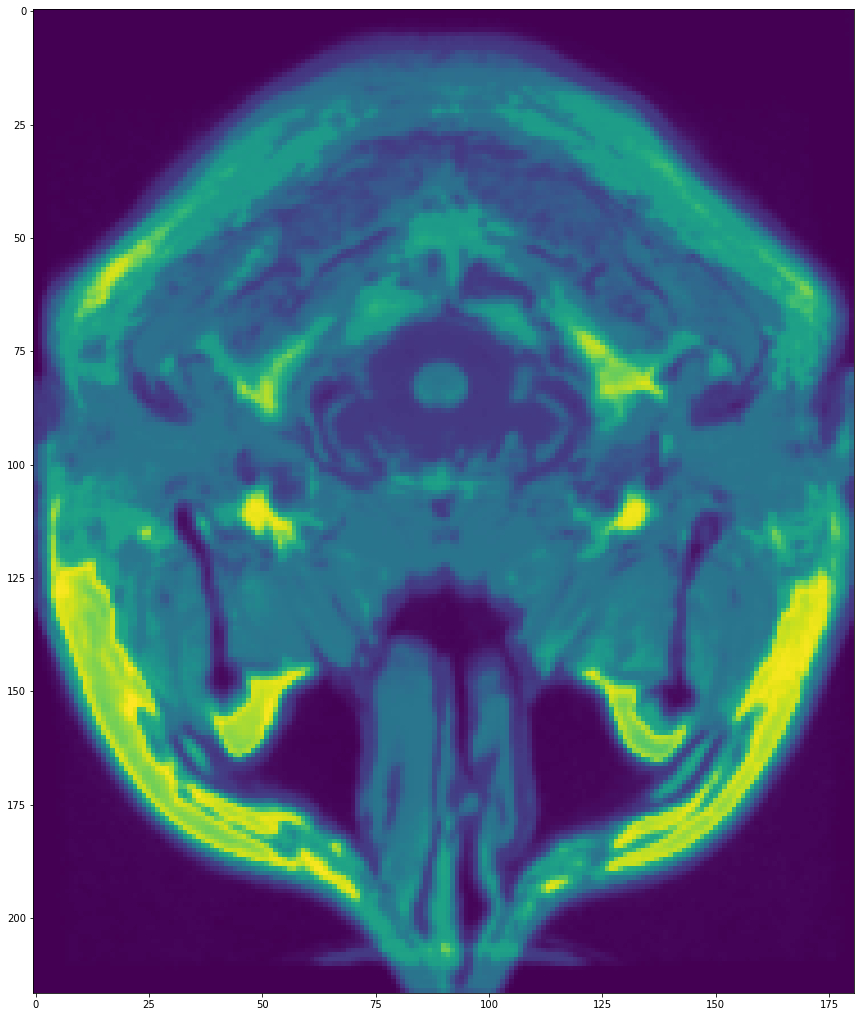

In [72]:
plot_data(data_ref, dim=0)

(array([3.354611e+06, 8.102900e+05, 5.348290e+05, 9.978560e+05,
        6.758870e+05, 5.849050e+05, 5.404800e+04, 5.616600e+04,
        3.760700e+04, 2.938000e+03]),
 array([7.73089141e-03, 1.36834904e+02, 2.73662076e+02, 4.10489249e+02,
        5.47316421e+02, 6.84143594e+02, 8.20970767e+02, 9.57797939e+02,
        1.09462511e+03, 1.23145228e+03, 1.36827946e+03]),
 <BarContainer object of 10 artists>)

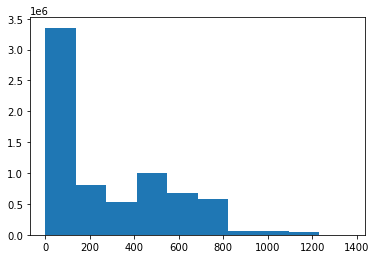

In [73]:
plt.hist(data_dis.flatten())

In [75]:
data_dis.max(), data_ref.max()

(1368.2794570922852, 1293.6168909072876)

(array([1.530000e+02, 7.451000e+03, 1.206610e+05, 7.247040e+05,
        1.832545e+06, 2.883559e+06, 1.336371e+06, 1.937960e+05,
        9.717000e+03, 1.800000e+02]),
 array([-103.71659099,  -81.90816861,  -60.09974622,  -38.29132384,
         -16.48290145,    5.32552094,   27.13394332,   48.94236571,
          70.7507881 ,   92.55921048,  114.36763287]),
 <BarContainer object of 10 artists>)

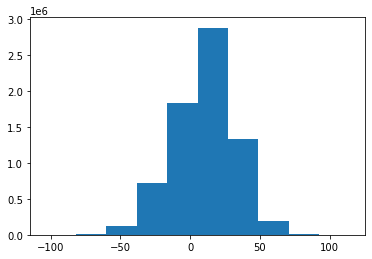

In [78]:
noise = (data_dis - data_ref).flatten()
modified = noise
plt.hist(modified)